 # <line > <center>Project : <br>Computing and Analysing 3-bodys and 5-bodys Systems </center> </line>
<font size='3'><div style="text-align: right"> <font color='545454'>MATAR Ludovic, ED DAHHAOUI Abdelilah, IBRAHIM Yassine</font>  </div></font> 
 ***

All along the Calcul Scientifique course and its practical works, we've learned how to numerically solve different analytical systems in numerous ways. One numerical procedure for solving ordinary differential equations are numerical schemes, such as the Explicit Euler method. We've used them to compute simple functions, for instance the exponential one. Now, we want to use them to compute Hamiltonian systems.

<div>
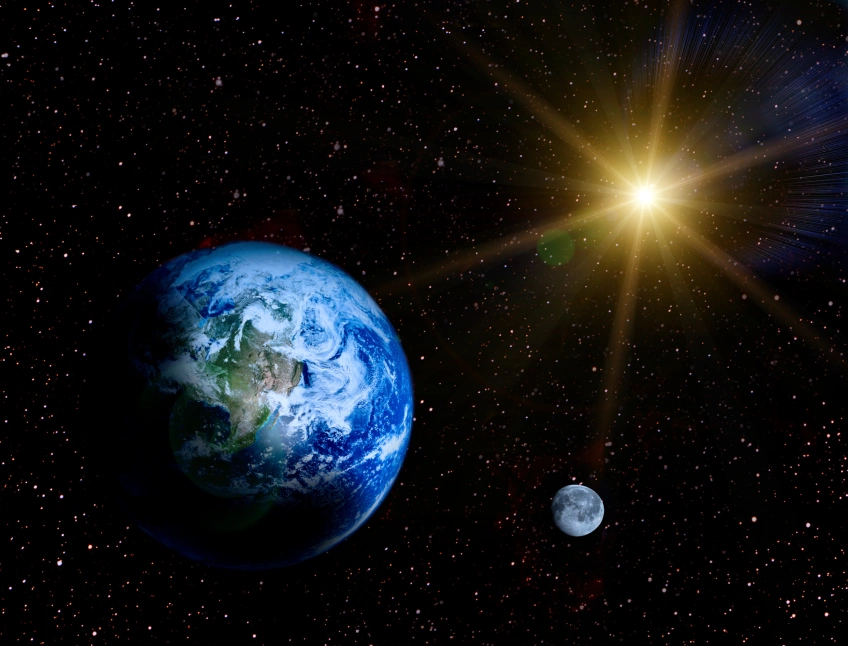
</div>

According to Wikipedia, the n-body problem is the problem of predicting the individual motions of a group of celestial objects interacting with each other gravitationally. Solving this problem is crucial to the understanding of the motions of the Sun, Moon, planets, and visible stars.

This project is heavily motivated (theory and data) by Shaula Fiorelli Vilmart and Gilles Vilmart's paper: **Computing the long term evolution of the solar system with geometric numerical integrators**. Other references will be listed at the end of the work.

## <font color='2c388e'>I. 3-bodys System: Sun, Earth and Moon</font> 

We first consider the Sun–Earth–Moon system, where for simplicity we neglect the other bodies and 
influences in the solar system. We represent the
positions of these three bodies at time t as 
$$ q_i(t)$$
where $i = 0$ corresponds to the Sun, $i = 1$ to the Earth, and $i = 2$ to the Moon.

Given the quasi-steady orbital properties of the Sun, Earth and Moon, we want to compute their interactive forces and predict their true orbital motions for all future times, using numerical schemes. We then want to study and analyse :
- the behaviour for long time simulations,
- the system stability .

### <font color='2986ae'>I. A) Equations</font> 

Newton's universal law of gravitation states the following formula, with $\vec{F}_{1\rightarrow 2}$ denoting the gravitational force applied by a body 1 (e.g. the Earth) to a body 2 (e.g. the Moon) :
$$\vec{F}_{1\rightarrow 2} = - \vec{F}_{2\rightarrow 1} = - G\frac{m_1m_2}{D^{2}}\vec{u}$$
where :
- $G$ is the universal constant of gravitation, 
- $D$ the distance between the two bodies,
- $\vec{u}$ the vector with unit length in the direction from 1 to 2.

The second law of dyamics then states that : 

$$ \vec{p_0}' = \vec{F}_{1\rightarrow 0} + \vec{F}_{2\rightarrow 0} $$
$$\vec{p_1}' = \vec{F}_{0\rightarrow 1} + \vec{F}_{2\rightarrow 1} $$
$$\vec{p_2}' = \vec{F}_{0\rightarrow 2} + \vec{F}_{1\rightarrow 2} $$

where $ \vec{p_i} = m_i \vec{q_i}'$.


Taking both laws, we get a system of six differential equations, to which we apply our numerical schemes.

The initial data we are given includes masses, positions and initial velocities of the Sun, the Earth and the Moon at a given date (01/01/2016), as well as the value of G. 
The initial positions and velocities are given in three dimensions. As such we will define our initial arrays (lines) of $p_i$ and $q_i$ like so :

$$ q(0) = \begin{bmatrix}
q_{0x}(0) & \\
q_{0y}(0)& \\
\vdots& \\
q_{2z}(0)& \\
\end{bmatrix}\left.\begin{matrix}
 & \\
 & \\
& \\
& \\
\end{matrix}\right\} \: \: 9 \, \text{lines}$$ 


$$ p(0) = \begin{bmatrix}
p_{0x}(0) & \\
p_{0y}(0)& \\
\vdots& \\
p_{2z}(0)& \\
\end{bmatrix}\left.\begin{matrix}
 & \\
 & \\
& \\
& \\
\end{matrix}\right\} \: \: 9 \, \text{lines}$$ 

We will compute the values of positions and velocities for a given period of time $t_{max}$, equally spread over a certain number $n$ of timesteps $dt$. At each timestep, the 9 new values of $q_i$ and $p_i$ are calculated and added as a new column to the initial arrays, so that they become :

$$q(t_{max}) = \underbrace{\begin{bmatrix}
q_{0x}(0) & q_{0x}(dt) & q_{0x}(2dt) & \cdots  & q_{0x}(t_{max}) \\
q_{0y}(0) & q_{0y}(dt) & q_{0y}(2dt) & \cdots  & q_{0y}(t_{max})\\
\vdots & \vdots & \vdots & \vdots \\
q_{2z}(0) & q_{2z}(dt) & q_{2z}(2dt) & \cdots  & q_{2z}(t_{max}) \\
\end{bmatrix}}\left.\begin{matrix}
 & \\
 & \\
& \\
& \\
& \\
\end{matrix}\right\} \: \: 9 \, \text{lines}$$
$$ n = \frac{t_{max}}{dt} \:\: \text{columns} $$ same for $p(t_{max})$.

In [1]:
#importing necessary modules

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [2]:
# Functions that compute the time derivatives of positions and momenta

# Obtaining q' using p
def fun_u(p,m):
    f = np.zeros(len(p)) #creates empty array the size of p
    for j in range(int(len(p)/3)):
        f[j*3:(j+1)*3] = p[j*3:(j+1)*3]/m[j]     # computes each q' using the momentum definition
    return f

# Obtaining p' using q
def fun_v(q,m):
    G = 2.95912208286e-4   #universal constant
    def vecf(v0):
        v = v0/(np.linalg.norm(v0)**3)   # returns the correct value of 1/D²
        return v
    f = np.zeros(len(q))            #creates empty array the size of q
    for i in range(int(len(q)/3)):
        for j in range(int(len(q)/3)):
            if j!=i:
                f[i*3:(i+1)*3] -= G*m[i]*m[j]*vecf(q[i*3:(i+1)*3]- q[j*3:(j+1)*3])  # p' using universal law of gravitation
    return f

### <font color='2986ae'>I. B) Numerical schemes application </font> 

There are a number of numerical schemes we can use in order to solve the equations. During this work, we'll focus only on three : **Symplectic Euler**, **Explicit Euler**, and **Verlet**. 

#### <font color=' #37a7d8'>I. B. 1) Symplectic Euler </font> 

**Symplectic Euler**, also known as the semi-implicit Euler method is a numerical integration scheme designed for Hamiltonian systems. It is described by the following formula for $q$ and $p$ :

$$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (q_n',p_{n+1}')$$

Since it's a symplectic integrator, it should be stable for our system, as its primary purpose is the computation of long-term evolution Hamiltonian systems, possibly chaotic ones.

In [3]:
# The dd value will serve to create sampled (vq_samp, vp_samp) arrays of the final arrays of p and q
# Since we are running long time simulations, we will need them if we want to animate the trajectories for less time

def euler_sympletic(tmax,dt,p0,q0,m,dd):
    n = int(tmax/dt)  
    n2 = int(n/dd)+1  
    vp = np.zeros((len(p0),n)) 
    vq = np.zeros((len(q0),n))
    t = np.zeros((n))
    vp[:,0] = p0
    vq[:,0] = q0
    vp_samp = np.zeros((len(p0),n2))
    vq_samp = np.zeros((len(q0),n2))
    t_samp = np.zeros((n2))
    j =0
    for i in range(0,n-1):
        vq[:,i+1] = vq[:,i] + dt * fun_u(vp[:,i],m)    #numerical scheme
        vp[:,i+1] = vp[:,i] + dt * fun_v(vq[:,i+1],m)
        t[i+1] = dt+t[i]
        if i%dd==0:
            vp_samp[:,j] = vp[:,i]       #sampling every ddth value
            vq_samp[:,j] = vq[:,i]
            t_samp[j] = t[i]
            j+=1
    return t,vp,vq,vq_samp, vp_samp,t_samp

def focus_sun(q):  #get a better view of the trajectories
    q[6:9,:] = q[3:6,:] + 100*(q[6:9,:]-q[3:6,:])
    q[3:6,:] = q[3:6,:] - q[0:3,:]  
    q[6:9,:] = q[6:9,:] - q[0:3,:]
    return q

#### <font color=' #37a7d8'>I. B. 2) Computation and Simulation </font> 

Let's try to compute this 3-bodys system evolution, using initial data found in reference.

In [4]:
#initial data 

m_0 = 1.  #sun mass, reference point
m_1 = 3.00348959632E-6 #earth mass relative to sun's
m_2 = 1.23000383E-2 * m_1 #moon mass relative to sun's
m = np.array([m_0,m_1,m_2])
q0=np.array([0,0,0,-0.1667743823220, 0.9690675883429,-0.0000342671456,-0.1694619061456, 0.9692330175719,-0.0000266725711])
#positions in ua
v0=np.array([0,0,0,-0.0172346557280,-0.0029762680930,-0.0000004154391,-0.0172817331582,-0.0035325102831,0.0000491191454])
#velocities in ua/d
p0 = np.zeros(9)
p0[0:3]= v0[0:3]*m_0
p0[3:6]= v0[3:6]*m_1
p0[6:9]= v0[6:9]*m_2

The initial data and functions being defined, we now want to run a simulation of the evolution of the three bodies. To properly determine the system's as well as the scheme's stability, we will compute for $t_{max} = 10 \, \text{years}$. For this fixed period of time, we will also try different timesteps : $dt = 1, 2, 3$ and $4$ days.

In [5]:
#plotting the system evolution for different timesteps 

def stabilityplot(dt,scheme,m, p0 = p0, q0 = q0):
    plt.figure(figsize=(8,8))
    plt.suptitle(f'3-bodys-system evolution over 10 years, {scheme.__name__} scheme',fontsize=10)
    for (j,dt) in enumerate(dt):
        t_max = 365*10 #in days
        
        #computing for each dt
        t,p,q,samp_q, samp_p,samp_t = scheme(tmax = t_max, dt = dt, p0 = p0, q0 = q0,m=m,dd=15.0) 
        q = focus_sun(q) # 
        
        #plot 
        ax = plt.subplot(2,2,j+1)
        ax.plot(q[0,:],q[1,:],'o', c='orange', label='Sun')
        ax.plot(q[3,:],q[4,:], 'b-o',label='Earth')
        ax.plot(q[6,:],q[7,:], 'k', label='Moon')
        ax.set_title(label=f'dt ={dt} days and n = {int(t_max/dt)} time steps', fontsize=10)
        if j > 1 :
            plt.xlabel(r'$q_x$ (ua)')
        if j == 0 or j == 2 :
            plt.ylabel(r'$q_y$ (ua)')
    plt.legend(bbox_to_anchor=(-1.2, 2.5),prop={'size':8})
        #p.figure(figsize=(6,6))
        #ax.margins(x=1, y=1) 
        #ax.axis("off")
    plt.show()



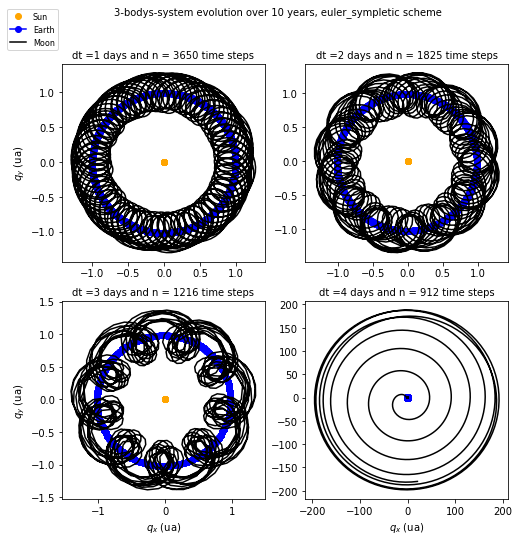

In [6]:
stabilityplot(dt = np.array([1, 2,3,4]),scheme = euler_sympletic,m=m, p0 = p0, q0 = q0)

Here we have plotted the three bodies's positions in the x and y plane. As we can see, for a relatively small $dt = 1 \, \text{day}$ (to the scale of the simulation), the symplectic euler method seems to be stable, as the trajectories are in line with how we are expecting the three bodies to behave. However, taking bigger timesteps ends up with differing results, as the scheme struggles more and more to properly approximate the trajectories, especially the Moon's. Indeed, with $dt = 4 \, \text{days}$, we can already see the Moon completely diverging at some point in time.

To see the system's behavior more clearly, we can plot the trajectories in 3d.

In [6]:
t_max = 365*10

#dt = 1 
t,p,q,samp_q, samp_p,samp_t = euler_sympletic(tmax = t_max, dt = 1, p0 = p0, q0 = q0,m=m,dd=2.0)
q = focus_sun(q) # focus with respect to the sun and multiply by 100 the earth moon distance
samp_q = focus_sun(samp_q)

#dt = 4
t4,p4,q4,samp_q4, samp_p4,samp_t4 = euler_sympletic(tmax = t_max, dt = 4, p0 = p0, q0 = q0,m=m,dd=1.0)
q4 = focus_sun(q4) # focus with respect to the sun and multiply by 100 the earth moon distance
samp_q4 = focus_sun(samp_q4)

In [7]:
class cat():
    def __init__(self, q,t):
        super().__init__()
        self.dataSet = q
        self.t = t
    def dataSet(self):
        return self.dataSet
    def __len__(self):
        return len(self.dataSet[0])
    def __getitem__(self,index):
        return self.dataSet[index]
    def animate_func(self, num):
        ax.clear()  # Clears the figure to update the line, point,   
                    # title, and axes
        # Updating Trajectory Line (num+1 due to Python indexing)
        ax.scatter(self.dataSet[3,np.max([0,num-120]):num+1], self.dataSet[4,np.max([0,num-120]):num+1],self.dataSet[5,np.max([0,num-120]):num+1], c='blue', marker='o', s = 2)
        ax.scatter(self.dataSet[6,np.max([0,num-40]):num+1], self.dataSet[7,np.max([0,num-40]):num+1],self.dataSet[8,np.max([0,num-40]):num+1], c='black', marker='o', s = 5)
        #ax.plot3D(self.dataSet[np.max([0,num-40]):num+1,2,0], self.dataSet[np.max([0,num-40]):num+1,2,1],self.dataSet[np.max([0,num-40]):num+1,2,2], c='orange')
        # Updating Point Location 
        ax.scatter(self.dataSet[3,num], self.dataSet[4,num], self.dataSet[5,num],c='blue', marker='o', label='Earth')
        ax.scatter(self.dataSet[6,num], self.dataSet[7,num], self.dataSet[8,num],c='black', marker='o', label='Moon')
        # Adding Constant Origin
        ax.scatter(self.dataSet[0, 0], self.dataSet[1, 0], self.dataSet[2, 0],c='orange', marker='o',label='Sun')
        # Setting Axes Limits
        ax.set_xlim3d([-1, 1])
        ax.set_ylim3d([-1, 1])
        ax.set_zlim3d([-.5, .5])
        # Adding Figure Labels
        months = int(np.round(self.t[num],decimals=2))//30
        y = months//12
        if months >=  12:
            months = months%12
        months = str(months)
        y = str(y)
        ax.legend()
        ax.set_title(f'Trajectory three bodies for dt = {dt} \nTime = {y} years {months} months \n{scheme} scheme ')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')    

SyntaxError: invalid syntax (<ipython-input-7-f768f3fab42f>, line 36)

In [8]:
%matplotlib notebook
dt = 1
scheme = euler_sympletic.__name__
q_SE = cat(samp_q,samp_t)
fig0 = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig0, q_SE.animate_func, interval=1,frames=len(q_SE))
plt.show()

NameError: name 'cat' is not defined

<IPython.core.display.Javascript object>


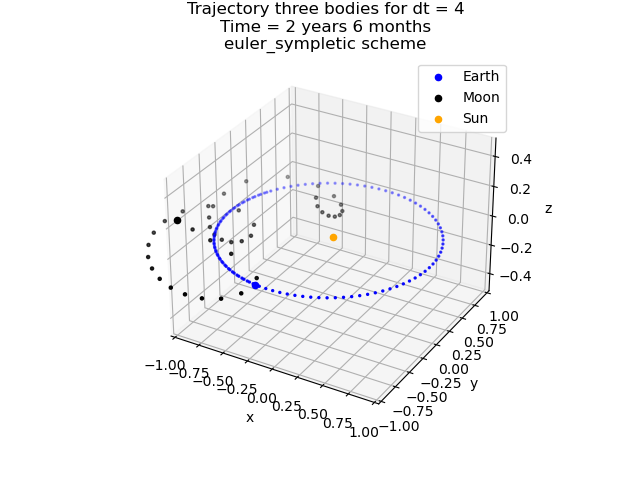

In [17]:
%matplotlib notebook
dt = 4
q_SE4 = cat(samp_q4,samp_t4)
fig4 = plt.figure(4)
ax = plt.axes(projection='3d')
line_ani4 = animation.FuncAnimation(fig4, q_SE4.animate_func, interval=1,frames=len(q_SE4))
plt.show()

As we can see, around the 6th month of the second year of simulation, for a $dt = 4 \, \text{days}$, the Moon ceases the orbit around the Earth and diverges far from the other celestial bodies.
This prompts us to determine the range of timesteps that is acceptable for a simulation of our system.

#### <font color=' #37a7d8'>I. B. 3) Scheme stability </font> 

A notable property of Hamiltonian systems is the conservation of their energy, and the **conservation of their linear momentum** $P$ **and angular momentum** $L$ :

$$P = \sum_{i=1}^{N}p_i$$
$$L = \sum_{i=1}^{N}q_i\times p_i$$

$N$ being the total number of bodies in the system.


We want to see if those quantities are conserved with our scheme, for a wide variety of timesteps. To do so, we compute the ratio of the last two momenta for several timesteps.

In [19]:
def Ratios(p0, q0,scheme, t_max = 365*10, dt = np.arange(1,500)):
    P = np.zeros((len(dt),3))
    RatioP = np.empty(0)
    RatioL = np.empty(0)
    for i in range(len(dt)):
        t,p,q,_,_,_ = scheme(tmax = t_max, dt = dt[i], p0 = p0, q0 = q0,m=m,dd=15.0)
        Ps = np.zeros((2,3))
        Ls = np.zeros((2,3))
        for j in [-2,-1]:  #last two quantities
            P=0
            L=0
            for k in range(int(len(q[:,0])/3)):
                P+= p[k*3:(k+1)*3,j]
                d = np.cross(q[k*3:(k+1)*3,j],p[k*3:(k+1)*3,j])
                L+= d
            Ps[j] = P
            Ls[j] = L
        RatioP = np.append(RatioP, np.linalg.norm(Ps[-1])/np.linalg.norm(Ps[-2]))
        RatioL = np.append(RatioL, np.linalg.norm(Ls[-1])/np.linalg.norm(Ls[-2]))
    return RatioP, RatioL

In [20]:
RatioP, RatioL = Ratios(p0,q0,euler_sympletic)

<IPython.core.display.Javascript object>


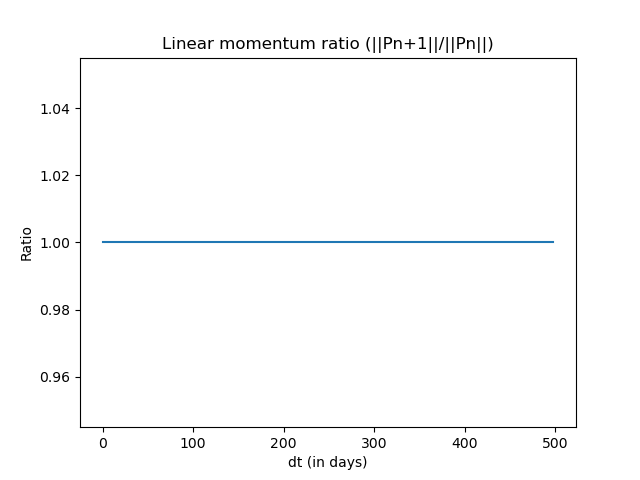

<IPython.core.display.Javascript object>


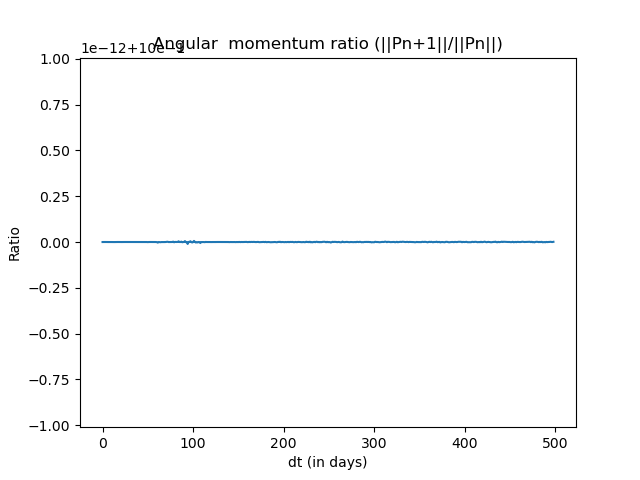

In [21]:
#plot
plt.figure()
plt.plot(RatioP)
plt.xlabel('dt (in days)')
plt.ylabel("Ratio")
plt.title('Linear momentum ratio (||Pn+1||/||Pn||)')
plt.show()
plt.figure()
plt.plot(RatioL)
plt.xlabel('dt (in days)')
plt.ylabel("Ratio")
plt.title('Angular  momentum ratio (||Pn+1||/||Pn||)')
plt.show()

The results show us that the system's total energy seems to be conserved for a wide range of timesteps. Nevertheless, the bigger the timestep, the less stable is that conservation, even if the variations are very slight. This shows that for our numerical integrator to work well, it is best to use the smallest timestep possible, having in mind for how long we want to observe the system's evolution. For an evolution of 10 years, $dt = 1 \, \text{day}$ seems to be enough, and **the Symplectic Euler scheme is stable for our system**.

#### <font color=' #37a7d8'>I. B. 4) Conclusion </font> 

For a small enough timestep, here $dt = 1 \, \text{day}$, the bodies behave as expected and there are no atypical behaviors from the system, even past 10 years of simulation. From this observation, and knowing that Symplectic integrators  compute Hamiltonian system, we can  assume that the **3-body-system is stable** in the long term.

#### <font color=' #37a7d8'>I. C. Explicit Euler </font> 

**Explicit Euler** is another numerical integration scheme. It is described by the following formula for $q$ and $p$ :

$$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (q_n',p_n')$$

This scheme, while being fairly well known, is never used for the resolution of systems as it isn't very accurate. Let's see how it fares for our system.

In [22]:
def euler_explicit(tmax,dt,p0,q0,m,dd):
    n = int(t_max/dt)
    n2 = int(n/dd)+1
    vp = np.zeros((len(p0),n))
    vq = np.zeros((len(q0),n))
    vp[:,0] = p0
    vq[:,0] = q0
    vp_samp = np.zeros((len(p0),n2))
    vq_samp = np.zeros((len(q0),n2))
    t_samp = np.zeros((n2))
    t = np.zeros((n))
    j =0
    for i in range(0,n-1):
        vq[:,i+1] = vq[:,i] + dt * fun_u(vp[:,i],m)
        vp[:,i+1] = vp[:,i] + dt * fun_v(vq[:,i],m)
        t[i+1] = dt+t[i]
        if i%dd==0:
            vp_samp[:,j] = vp[:,i]
            vq_samp[:,j] = vq[:,i]
            t_samp[j] = t[i]
            j+=1
    return t,vp,vq,vq_samp, vp_samp,t_samp

<IPython.core.display.Javascript object>


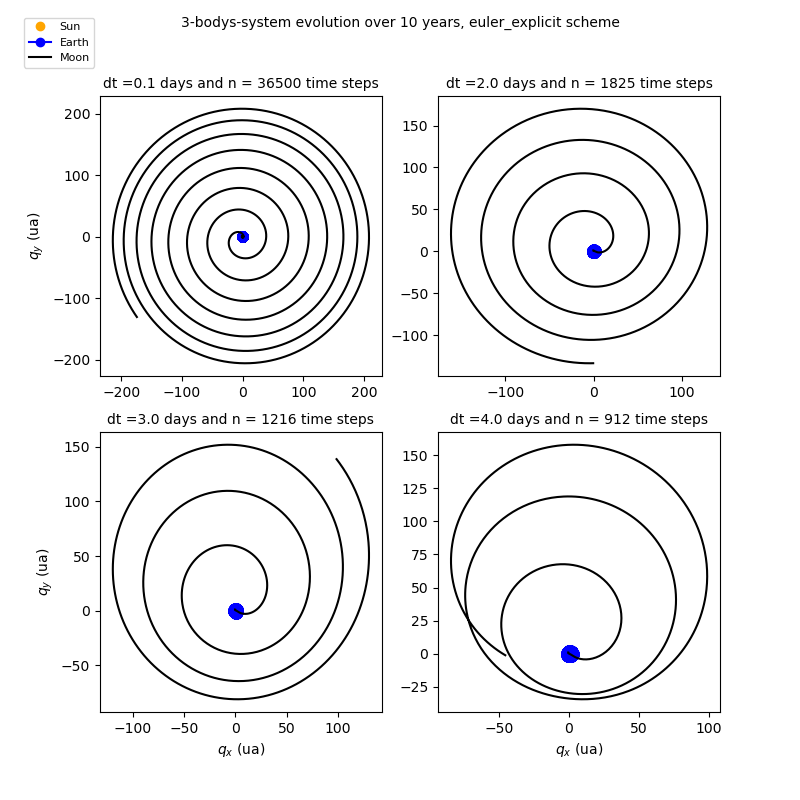

In [25]:
#computation and plot 

stabilityplot(dt = np.array([0.1, 2,3,4]),scheme = euler_explicit,m=m, p0 = p0, q0 = q0)

We can already see that for a very small timestep $dt = 0.1 \, \text{days}$, the system isn't behaving correctly. This is the same for subsequent bigger timesteps. From this, we can already conclude that the **Explicit Euler scheme isn't stable for Hamiltonian Systems**.

Let's see it in 3D :

In [26]:
dt = 0.1 
scheme = euler_explicit.__name__
t_max = 365*10
t_ee,p_ee,q_ee,samp_q_ee, samp_p_ee,samp_t_ee  = euler_explicit(tmax = t_max, dt = dt, p0 = p0, q0 = q0,dd=15,m=m)
# focus with respect to the sun
q_ee = focus_sun(q_ee)
samp_q_ee = focus_sun(samp_q_ee)
q_EE = cat(samp_q_ee,samp_t_ee)

<IPython.core.display.Javascript object>


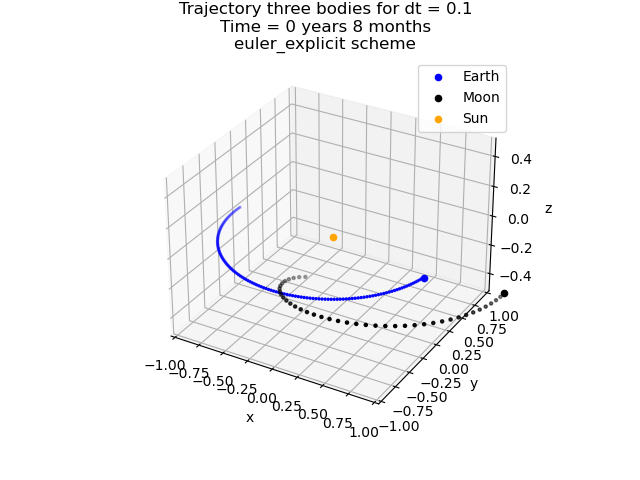

In [41]:
%matplotlib notebook
fig0 = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig0, q_EE.animate_func, interval=.0001,frames=len(q_EE))
plt.show()

The same observation can be made, as we can see the Moon orbits out of sight pretty early.

#### <font color=' #37a7d8'>I. D. Verlet </font> 

The last numerical integration scheme we'll take a look at is called **Verlet**. It is described by the following formula for $q$ and $p$ :

$$p_{aux} = p_n + 0.5  dt  p_n'$$
$$(q_{n+1}, p_{n+1}) = (q_n ,  p_n) + dt (\frac{p_{aux}}{m}, \frac{1}{2} (q_{n+1}' + q_n' ))$$
    
According to Wikipedia, it is frequently used to calculate trajectories of particles in molecular dynamics simulations for example. As it used to integrate Newton's equations, there's a good chance it's compatible for our system.

In [27]:
def verlet(tmax,dt,p0,q0,m,dd):
    n = int(tmax/dt)
    n2 = int(n/dd)+1
    vp = np.zeros((len(p0),n))
    vq = np.zeros((len(q0),n))
    vp[:,0] = p0
    vq[:,0] = q0
    vp_samp = np.zeros((len(p0),n2))
    vq_samp = np.zeros((len(q0),n2))
    t_samp = np.zeros((n2))
    t = np.zeros((n))
    j =0
    for i in range(n-1):
        p_aux = vp[:,i] + 0.5*dt*fun_v(vq[:,i],m)
        vq[:,i+1] = vq[:,i]+ dt*fun_u(p_aux,m)
        vp[:,i+1] = vp[:,i]+ 0.5*dt*(fun_v(vq[:,i+1],m) + fun_v(vq[:,i],m))
        t[i+1] = dt+t[i]
        if i%dd==0:
            vp_samp[:,j] = vp[:,i]
            vq_samp[:,j] = vq[:,i]
            t_samp[j] = t[i]
            j+=1
        
    return t,vp,vq,vq_samp, vp_samp,t_samp

<IPython.core.display.Javascript object>


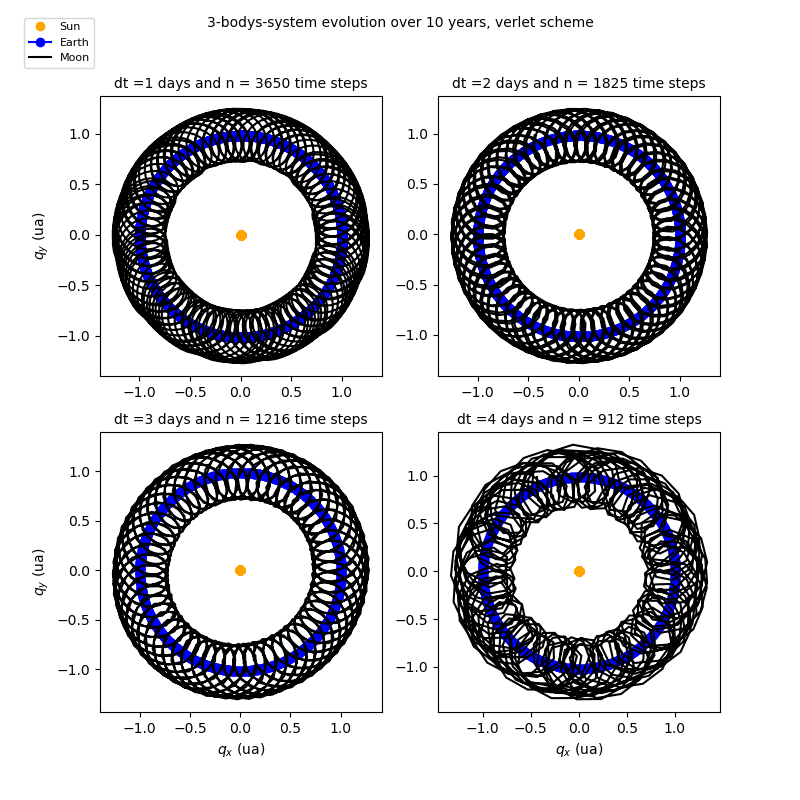

In [28]:
#computation and plot 
stabilityplot(dt = np.array([1, 2,3,4]),scheme = verlet,m=m, p0 = p0, q0 = q0)

The Verlet scheme seems to be working even better than Euler Symplectic, as the trajectories are properly approximated even with timesteps bigger than 1 day. As such, it is **stable for our system**.

In [44]:
#3D

dt = 1 
scheme = verlet.__name__
t_max = 365*10
t_vrlt,p_vrlt,q_vrlt,samp_q, samp_p,samp_t  = verlet(t_max, dt, p0, q0,m,dd=3)
q_vrlt = focus_sun(q_vrlt)
samp_q = focus_sun(samp_q)

<IPython.core.display.Javascript object>


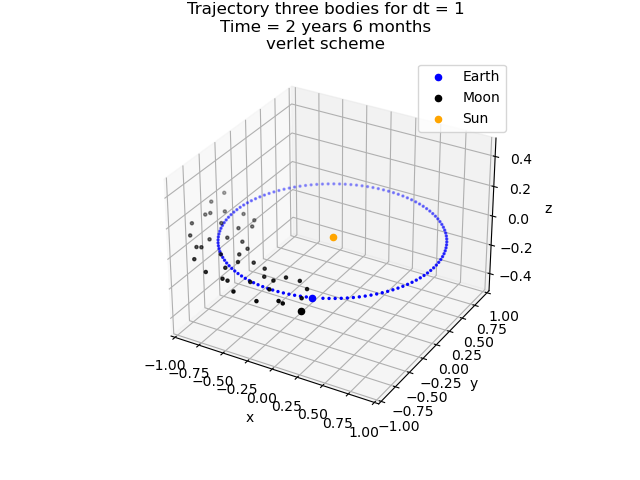

In [45]:
q_VRLT = cat(samp_q,samp_t)
%matplotlib notebook
fig0 = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig0, q_VRLT.animate_func, interval=.0001,frames=len(q_VRLT))
plt.show()

## <font color='2c388e'>II. 5-bodys System: Jupiter, Saturn, Uranus, Neptune, Pluton</font> 

We now take a similar system, but with two more bodies : we'll try to plot the trajectories of Jupiter, Saturn, Uranus, Neptune and Pluton around the Sun. The initial data is from September 5th 1994 at midnight. 

The equations used are the same, only adapted to two more bodies. We apply our three numerical schemes to it.

In [48]:
m_0 = 1.0
m_1 = 9.54786104043E-4 #jupiter mass
m_2 = 2.85583733151E-4 #saturn mass
m_3 = 4.37273164546E-5 #uranus mass
m_4 = 5.17759138449E-5 #neptune mass
m_5 = 1/(1.3*10**8) #pluto mass
m = np.array([m_0,m_1,m_2,m_3,m_4,m_5])
G = 2.95912208286e-4
q0=np.array([0,0,0,-3.5023653,-3.8169847,-1.5507963,9.0755314,-3.0458353,-1.6483708,8.3101420,-16.2901086,-7.2521278,11.4707666,-25.7294829,-10.8169456,-15.5387357,-25.2225594,-3.1902382])
v0=np.array([0,0,0,0.00565429,-0.00412490,-0.00190589,0.00168318,0.00483525,0.00192462,0.00354178,0.00137102,0.00055029,0.00288930,0.00114527,0.00039677,0.00276725,-0.00170702,-0.00136504])
p0 = np.zeros(18)
p0[0:3]= v0[0:3]*m_0
p0[3:6]= v0[3:6]*m_1
p0[6:9]= v0[6:9]*m_2
p0[9:12]= v0[9:12]*m_3
p0[12:15]= v0[12:15]*m_4
p0[15:18]= v0[15:18]*m_5

The simulations will be run over $t_{max} = 1000 \, \text{years}$, using  $dt = 25\, \text{days}$.

#### <font color=' #37a7d8'>II. A. Symplectic Euler </font> 

In [49]:
dt = 25
scheme = euler_sympletic.__name__
t_max = 365*1000

In [50]:
t,p,q,samp_q, samp_p,samp_t = euler_sympletic(t_max, dt, p0, q0,m,dd=15)

<IPython.core.display.Javascript object>


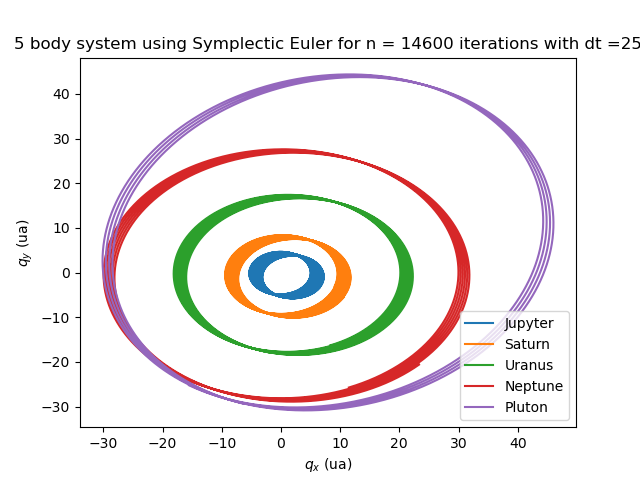

In [51]:
plt.figure()
plt.plot(q[3,:],q[4,:], label = 'Jupyter')
plt.plot(q[6,:],q[7,:], label = 'Saturn')
plt.plot(q[9,:],q[10,:], label = 'Uranus')
plt.plot(q[12,:],q[13,:], label = 'Neptune')
plt.plot(q[15,:],q[16,:], label = 'Pluton')
plt.xlabel(r'$q_x$ (ua)')
plt.ylabel(r'$q_y$ (ua)')
plt.legend()
plt.title(f'5 body system using Symplectic Euler for n = {int(t_max/dt)} iterations with dt ={dt}')
plt.show()

In [37]:
class cat5():
    def __init__(self, q,t):
        super().__init__()
        self.dataSet = q
        self.t = t
    def dataSet(self):
        return self.dataSet
    def __len__(self):
        return len(self.dataSet[0])
    def __getitem__(self,index):
        return self.dataSet[index]
    def animate_func(self, num):
        ax.clear()  # Clears the figure to update the line, point,   
        # Updating Trajectory Line (num+1 due to Python indexing)
        ax.plot3D(self.dataSet[3,np.max([0,num-400]):num+1], self.dataSet[4,np.max([0,num-400]):num+1],self.dataSet[5,np.max([0,num-400]):num+1], c='blue',label = 'Jupyter')
        ax.plot3D(self.dataSet[6,np.max([0,num-400]):num+1], self.dataSet[7,np.max([0,num-400]):num+1],self.dataSet[8,np.max([0,num-400]):num+1], c='purple',label = 'Saturn')
        ax.plot3D(self.dataSet[9,np.max([0,num-400]):num+1], self.dataSet[10,np.max([0,num-400]):num+1],self.dataSet[11,np.max([0,num-400]):num+1], c='green',label = 'Uranus')
        ax.plot3D(self.dataSet[12,np.max([0,num-400]):num+1], self.dataSet[13,np.max([0,num-400]):num+1],self.dataSet[14,np.max([0,num-400]):num+1], c='black',label = 'Neptune')
        ax.plot3D(self.dataSet[15,np.max([0,num-400]):num+1], self.dataSet[16,np.max([0,num-400]):num+1],self.dataSet[17,np.max([0,num-400]):num+1], c='red',label = 'Pluton')
        # Updating Point Location 
        ax.scatter(self.dataSet[3,num], self.dataSet[4,num], self.dataSet[5,num],c='black', marker='o')
        ax.scatter(self.dataSet[6,num], self.dataSet[7,num], self.dataSet[8,num],c='black', marker='o')
        ax.scatter(self.dataSet[9,num], self.dataSet[10,num], self.dataSet[11,num],c='black', marker='o')
        ax.scatter(self.dataSet[12,num], self.dataSet[13,num], self.dataSet[14,num],c='black', marker='o')
        ax.scatter(self.dataSet[15,num], self.dataSet[16,num], self.dataSet[17,num],c='black', marker='o')
        #ax.scatter(self.dataSet[num,2,0], self.dataSet[num,2,1], self.dataSet[num,2,2],c='orange', marker='o')
        # Adding Constant Origin
        ax.plot3D(self.dataSet[0, 0], self.dataSet[1, 0], self.dataSet[2, 0],c='orange', marker='o', label='Sun')
        # Setting Axes Limits
        ax.set_xlim3d([-40, 40])
        ax.set_ylim3d([-40, 40])
        ax.set_zlim3d([-10, 10])
        # Adding Figure Labels
        months = int(np.round(self.t[num],decimals=2))//30
        y = months//12
        if months >=  12:
            months = months%12
        months = str(months)
        y = str(y)
        ax.legend()
        ax.set_title(f'Trajectory five bodies for dt = {dt} \nTime = {y} years {months} months \n{scheme} scheme')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    

In [38]:
q5_SE = cat5(samp_q,samp_t)

<IPython.core.display.Javascript object>


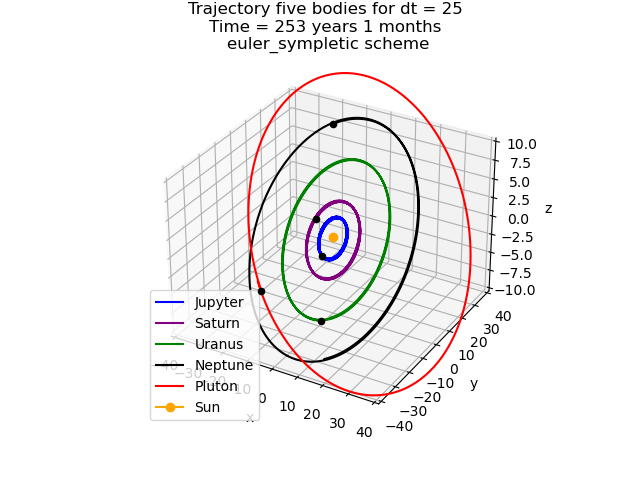

In [39]:
%matplotlib notebook
fig0 = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig0, q5_SE.animate_func, interval=.0001,frames=len(q5_SE))
#plt.legend()
plt.show()

The symplectic integrator seems to be working yet again, as the trajectories are what we expected. For exemple, Pluton orbits entirely around the Sun in 248 years, which is what is observed here. Once again, **the system is stable in the long term**.

#### <font color=' #37a7d8'>II. B. Explicit Euler </font> 

In [40]:
dt = 25
scheme = euler_explicit.__name__
t_max = 365*1000
t,p,q,samp_q_ee, samp_p_ee,samp_t_ee  = euler_explicit(t_max, dt, p0, q0,dd=15,m=m)

<IPython.core.display.Javascript object>


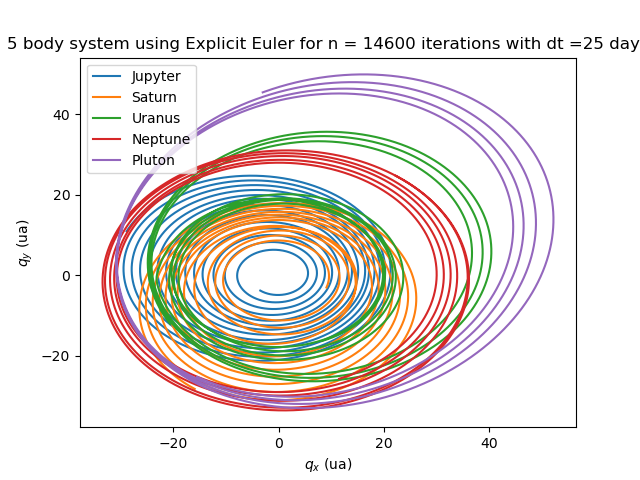

In [41]:
plt.figure()
plt.plot(q[3,:],q[4,:], label = 'Jupyter')
plt.plot(q[6,:],q[7,:], label = 'Saturn')
plt.plot(q[9,:],q[10,:], label = 'Uranus')
plt.plot(q[12,:],q[13,:], label = 'Neptune')
plt.plot(q[15,:],q[16,:], label = 'Pluton')
plt.xlabel(r'$q_x$ (ua)')
plt.ylabel(r'$q_y$ (ua)')
plt.legend()
plt.title(f'5 body system using Explicit Euler for n = {int(t_max/dt)} iterations with dt ={dt} days')
plt.show()

In [42]:
q5_EE = cat5(samp_q_ee,samp_t_ee)

<IPython.core.display.Javascript object>


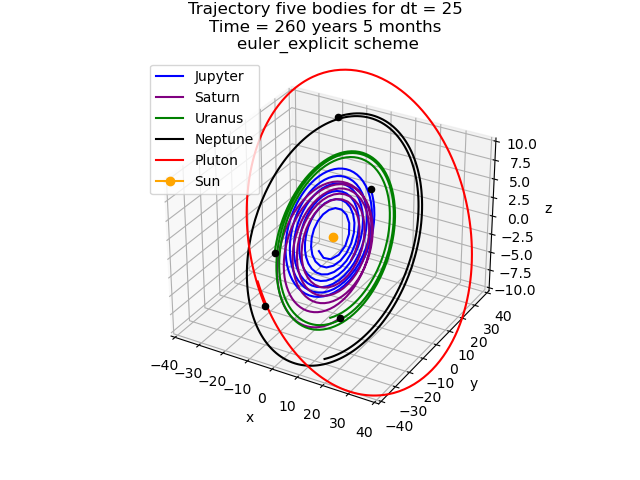

In [43]:
%matplotlib notebook
fig0 = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig0, q5_EE.animate_func, interval=.0001,frames=len(q5_EE))
plt.show()

**The explicit euler scheme isn't stable for this system**, as the bodies don't follow the same trajectories every time they make a full orbit around the Sun.

#### <font color=' #37a7d8'>II. C. Verlet </font> 

In [45]:
dt = 25
scheme = verlet.__name__
t_max = 365*1000
t_v,p_v,q_v,samp_q_v, samp_p_v,samp_t_v = verlet(t_max, dt, p0, q0,m,dd=15)

<IPython.core.display.Javascript object>


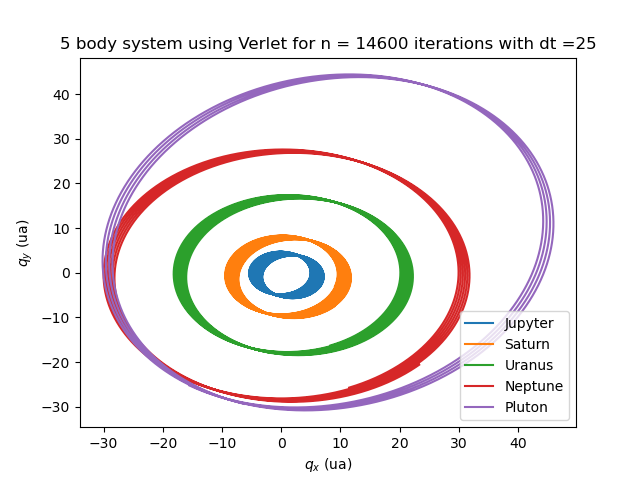

In [46]:
plt.figure()
plt.plot(q_v[3,:],q_v[4,:], label = 'Jupyter')
plt.plot(q_v[6,:],q_v[7,:], label = 'Saturn')
plt.plot(q_v[9,:],q_v[10,:], label = 'Uranus')
plt.plot(q_v[12,:],q_v[13,:], label = 'Neptune')
plt.plot(q_v[15,:],q_v[16,:], label = 'Pluton')
plt.xlabel(r'$q_x$ (ua)')
plt.ylabel(r'$q_y$ (ua)')
plt.legend()
plt.title(f'5 body system using Verlet for n = {int(t_max/dt)} iterations with dt ={dt}')
plt.show()

<IPython.core.display.Javascript object>


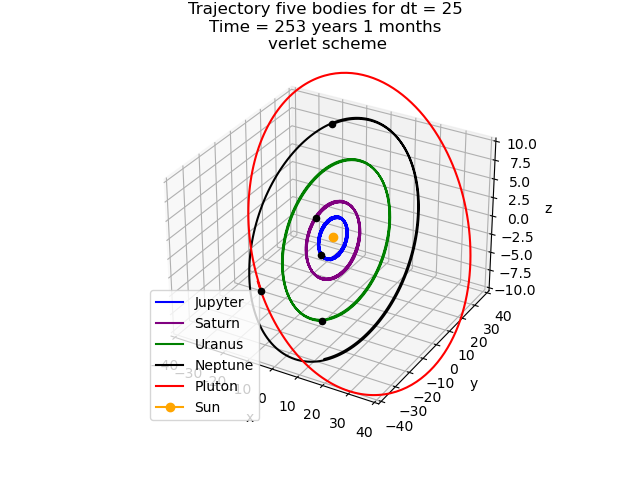

In [47]:
q5_VRLT = cat5(samp_q_v,samp_t_v)
%matplotlib notebook
fig0 = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig0, q5_VRLT.animate_func, interval=.0001,frames=len(q5_VRLT))
plt.show()

The Verlet scheme is also **stable for the system**.

## <font color='2c388e'>III. Conclusion</font> 

During this project, we've managed to write and compute the equations for 3-body and 5-body problems using several numerical schemes. We've managed to identify schemes that are stable for those systems, such as the **Symplectic Euler** and **Verlet** schemes. Using those, we have simulated the bodies' trajectories over long period of times and concurred that the systems were **stable in the long term**. 

However, it is stated in one of the papers that chaotic behavior of the solar system was already proved. Indeed, a small error of a few meters in the initial position of one of the body should be amplified by a factor 10 every 10 million years,
leading to a huge error of dozens of millions of kilometers after 100 million years. This is why the stability of the systems we've concurred over a period of 10 or 1000 years if fairly relative, and precise numerical predictions become infeasible beyond a time horizon of 100 million years.

## <font color='2c388e'>IV. References</font> 

- Theory and data for the 3-bodies and 5-bodies problem
  - Computing the long term evolution of the solar system with geometric numerical integrators
    Shaula Fiorelli Vilmart/Gilles Vilmart - https://hal.archives-ouvertes.fr/hal-01560573v2
  - Geometric Numerical Integration - Ernst Hairer, Christian Lubich, Gerhard Wanner - Chapter 1